# Importing the Libraries


In [1]:
import numpy as np
import pandas as pd # Data Manipulation, Data Cleaning, Data Exploration, Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Importing the Dataset

In [4]:
df = pd.read_csv("/content/Housing.csv")

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [6]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [8]:
df.shape

(545, 13)

In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [10]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Defining the Model

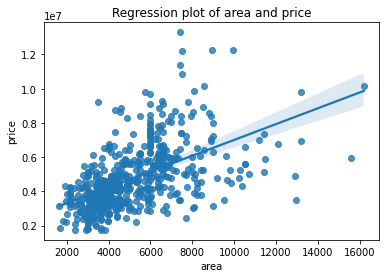

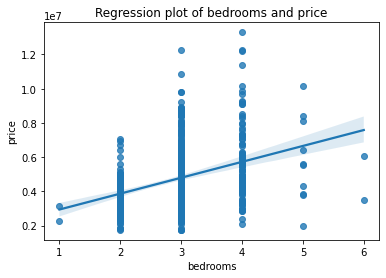

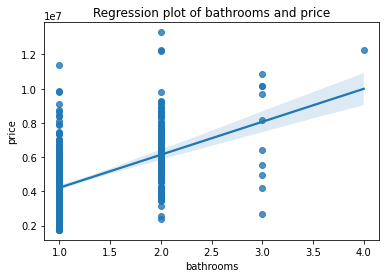

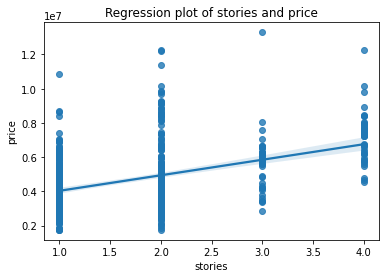

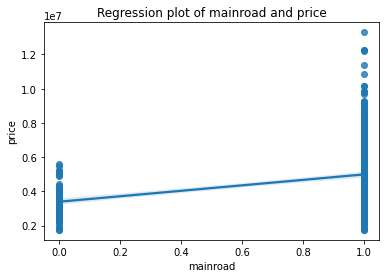

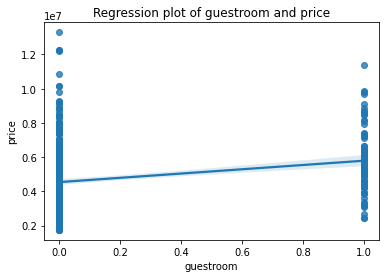

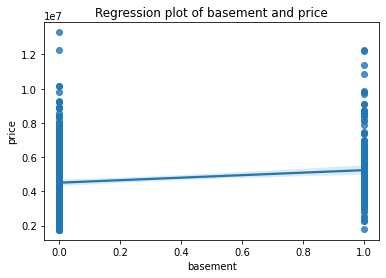

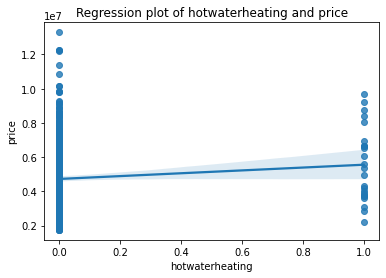

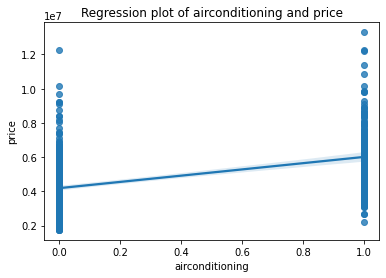

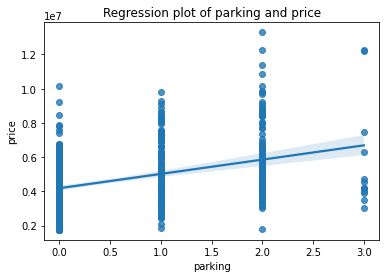

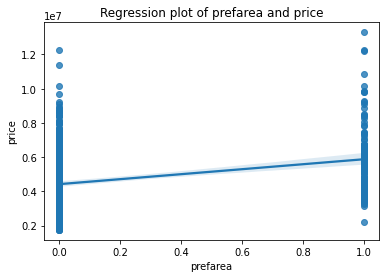

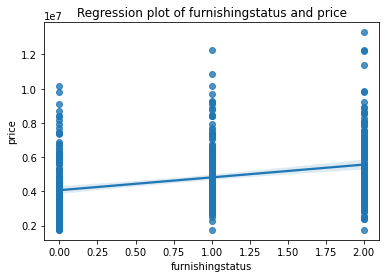

In [36]:
variables = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
             'guestroom', 'basement',	'hotwaterheating', 'airconditioning',
             'parking', 'prefarea', 'furnishingstatus']

for var in variables:
    plt.figure() 
    sns.regplot(x=var, y='price', data=df).set(title=f'Regression plot of {var} and price');

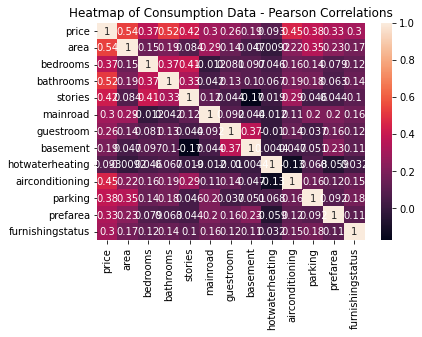

In [37]:
correlations = df.corr()
sns.heatmap(correlations, annot=True).set(title='Heatmap of Consumption Data - Pearson Correlations');

# Preparing the Data

In [38]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',	'guestroom',
        'basement',	'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = df.price 

In [39]:
X.ndim

2

In [40]:
y.ndim

1

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Training the Model

In [42]:
X.shape

(545, 12)

In [43]:
len(X_train)

436

In [44]:
len(X_test)

109

In [45]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [46]:
regressor.intercept_

-206903.69778135233

In [47]:
regressor.coef_

array([2.56841614e+02, 8.32158263e+04, 9.05466387e+05, 4.74827566e+05,
       4.01391374e+05, 3.64240152e+05, 4.05266897e+05, 3.51055410e+05,
       9.26135866e+05, 2.77969183e+05, 6.28896279e+05, 1.73638635e+05])

In [48]:
feature_names = X.columns

In [49]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                  Coefficient value
area                     256.841614
bedrooms               83215.826331
bathrooms             905466.386508
stories               474827.566270
mainroad              401391.373546
guestroom             364240.152121
basement              405266.896722
hotwaterheating       351055.409715
airconditioning       926135.865962
parking               277969.182947
prefarea              628896.278565
furnishingstatus      173638.634908


# Testing the Model

In [50]:
y_pred = regressor.predict(X_test)

Predicted Value

In [51]:
y_pred 

array([ 3475048.41163341,  8437455.24145886,  3115192.18674029,
        5068959.75352999,  3459154.25779234,  4152138.72486662,
        6015100.09566136,  7071907.07540385,  4574822.91250382,
        3732760.53573334,  5441155.58002658,  5795413.25890635,
        4906053.90050394,  3530054.53420212,  6244362.44645588,
        3724184.77692464,  2865144.52150632,  2640158.92916175,
        4488039.61677227,  5240207.02237806,  3993977.90197862,
        4995055.92570522,  3156389.20739948,  3604592.31156069,
        6077540.06191997,  5271865.86215348,  2842028.77627311,
        3529342.83418976,  5905169.7656106 ,  3769417.21412742,
        4141074.71265534,  4345613.55184243,  3921687.13002658,
        4076747.45851225,  2961210.94628962,  5305498.78567271,
        6545257.47702278,  3961168.73234622,  2239794.06556202,
        7690200.2703413 ,  4171902.58335281,  5500100.87557205,
        4252758.99457572,  3992709.28864604,  2735887.41709801,
        6075550.94933197,  2668660.68702

Actual Value

In [52]:
y_test 

185     5110000
7      10150000
409     3430000
147     5600000
519     2450000
         ...   
320     4060000
334     3920000
216     4830000
319     4060000
154     5530000
Name: price, Length: 109, dtype: int64

In [53]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

       Actual     Predicted
185   5110000  3.475048e+06
7    10150000  8.437455e+06
409   3430000  3.115192e+06
147   5600000  5.068960e+06
519   2450000  3.459154e+06
..        ...           ...
320   4060000  4.940924e+06
334   3920000  3.562524e+06
216   4830000  4.734226e+06
319   4060000  5.688805e+06
154   5530000  4.871772e+06

[109 rows x 2 columns]


Accuracy

In [54]:
r2_score(y_test, y_pred)

0.6578993725991469

# Evaluating the Model

In [55]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 801433.28
Mean squared error: 1123836278490.67
Root mean squared error: 1060111.45


In [56]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.6578993725991471


In [57]:
regressor.score(X_test, y_test)

0.6578993725991469

In [58]:
regressor.score(X_train, y_train)

0.6780704208122634

In [59]:
regressor.predict([[7420, 4, 2, 3, 1, 0, 0, 0, 1, 2, 1, 2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([8126779.00682189])

In [4]:
from copyreg import pickle


with open('regressor.pkl', 'wb') as files:
    pickle.dump(regressor, files)

AttributeError: 'function' object has no attribute 'dump'